In [ ]:
Employee Satisfaction 
What departments or managers have the most employee satisfaction?
Is employee satisfaction associated with turnover?


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#import data
hr_data = pd.read_csv("data/HRDataset.csv")


In [9]:
## view first 5 rows of your data
hr_data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [ ]:
# TODO: Select only relevant columns
satisfaction = hr_data[["Department", "ManagerName", "EmpSatisfaction", "TermReason"]]
satisfaction

,Department,ManagerName,EmpSatisfaction,TermReason
0,Production,Michael Albert,5,N/A-StillEmployed
1,IT/IS,Simon Roup,3,career change
2,Production,Kissy Sullivan,3,hours
3,Production,Elijiah Gray,5,N/A-StillEmployed
4,Production,Webster Butler,4,return to school
...,...,...,...,...
306,Production,Kissy Sullivan,4,N/A-StillEmployed
307,Production,Brannon Miller,2,Another position
308,IT/IS,Janet King,5,N/A-StillEmployed
309,IT/IS,Simon Roup,3,N/A-StillEmployed


In [15]:
#Identify null values
satisfaction.isnull().sum()

Department         0
ManagerName        0
EmpSatisfaction    0
TermReason         0
dtype: int64

In [ ]:
#Evaluate Employee Satisfaction for each department
satisfaction.groupby('Department').agg({'EmpSatisfaction' : ['mean', 'max', 'count', 'sum']})

EmpSatisfaction               
                                mean max count  sum
Department                                         
Admin Offices               3.555556   5     9   32
Executive Office            3.000000   3     1    3
IT/IS                       3.960000   5    50  198
Production                  3.861244   5   209  807
Sales                       4.032258   5    31  125
Software Engineering        4.090909   5    11   45

In [ ]:
#Evaluate Employee Satisfaction by manager in each department 
satisfaction.groupby(['Department','ManagerName']).agg({'EmpSatisfaction' : ['mean', 'max', 'count', 'sum']})

EmpSatisfaction              
                                                   mean max count sum
Department           ManagerName                                     
Admin Offices        Board of Directors        3.000000   3     1   3
                     Brandon R. LeBlanc        3.571429   5     7  25
                     Janet King                4.000000   4     1   4
Executive Office     Board of Directors        3.000000   3     1   3
IT/IS                Brian Champaigne          4.000000   5     8  32
                     Eric Dougall              3.500000   4     4  14
                     Janet King                5.000000   5     1   5
                     Jennifer Zamora           4.500000   5     6  27
                     Peter Monroe              3.928571   5    14  55
                     Simon Roup                3.823529   5    17  65
Production           Amy Dunn                  3.809524   5    21  80
                     Brannon Miller            3.409091   5    22  75
                     David Stanley             3.952381   5    21  83
                     Elijiah Gray              3.954545   5    22  87
                     Janet King                3.466667   5    15  52
                     Kelley Spirea             3.818182   5    22  84
                     Ketsia Liebig             4.095238   5    21  86
                     Kissy Sullivan            3.909091   5    22  86
                     Michael Albert            4.045455   5    22  89
                     Webster Butler            4.047619   5    21  85
Sales                Debra Houlihan            4.333333   5     3  13
                     Janet King                4.000000   4     1   4
                     John Smith                3.928571   5    14  55
                     Lynn Daneault             4.076923   5    13  53
Software Engineering Alex Sweetwater           4.222222   5     9  38
                     Janet King                4.000000   4     1   4
                     Jennifer Zamora           3.000000   3     1   3

In [43]:
depart_avg = satisfaction.groupby('Department').agg({'EmpSatisfaction' : ['mean']})
depart_avg

,EmpSatisfaction
,mean
Department,
Admin Offices,3.555556
Executive Office,3.000000
IT/IS,3.960000
Production,3.861244
Sales,4.032258
Software Engineering,4.090909


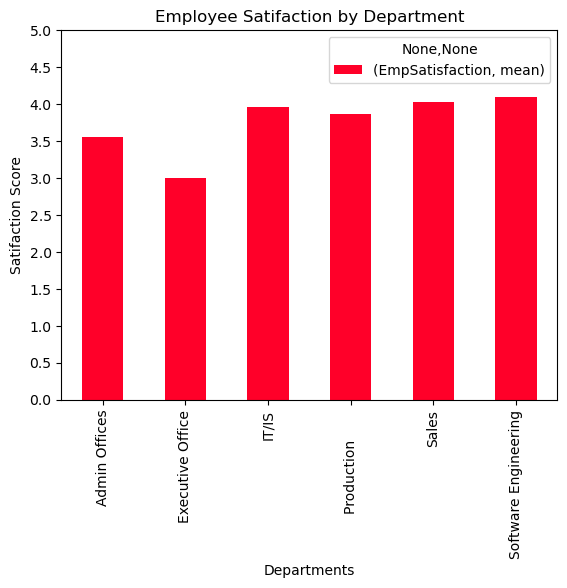

In [51]:
depart_avg.plot(kind= "bar", colormap= "gist_rainbow")
plt.xlabel('Departments')
plt.ylabel('Satifaction Score')
plt.title('Employee Satifaction by Department')
plt.yticks([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
plt.show()

In [ ]:
#Filter by manager for satifaction score 